IMPORTING LIBRARIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cluster import KMeans

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def getKMeans(n_clusters, random_state=100, n_init=20, max_iter=100,tol=0.00001):

    return KMeans(
        n_clusters = n_clusters,
        random_state = random_state,
        n_init = n_init,
        init = 'k-means++',
        max_iter = max_iter,
        tol=tol
    )

In [ ]:
def KMeansSihouettePlot(dataframe,max_cluster_size,random_state=100,n_init=20,max_iter=100,tol=0.00001,color=None):

    silhouette_coefficients = []
    for n in range(2, max_cluster_size):
        kmeans = getKMeans(n,random_state,n_init,max_iter,tol)
        cluster_labels = kmeans.fit_predict(dataframe)
        silhouette_coefficients.append(silhouette_score(dataframe,cluster_labels))
        plt.plot(range(2,n+1), silhouette_coefficients,color=color)
        plt.title("Silhouette Coefficient Scores Plot")
        plt.xlabel("Cluster size (n)")
        plt.ylabel("Silhouette Coefficient Score")

In [ ]:
def sihouetteVisualizer(dataframe, estimator):

    model = SilhouetteVisualizer(estimator)
    model.fit(dataframe)
    model.finalize()

LOADING DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Marketing_campaign.xlsx to Marketing_campaign.xlsx


In [ ]:
data = pd.read_excel("Marketing_campaign.xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


*   Median DOB of customers is 1970.
*   A customer visited the company's website 5.3 times on an average in last month.
*   The mean Income of customers is $52247.
*   A customer on an average makes purchases in about 49 days.





In [ ]:
data.shape

(2240, 29)

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 null values in the dataset, in the 'Income' column

<Axes: xlabel='Education', ylabel='count'>

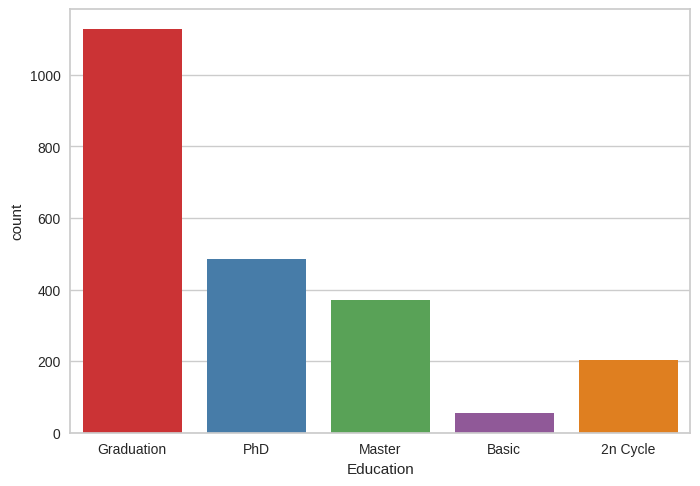

In [ ]:
sns.countplot(data, x='Education', palette = 'Set1')

5 Levels of education with Graduation being the most

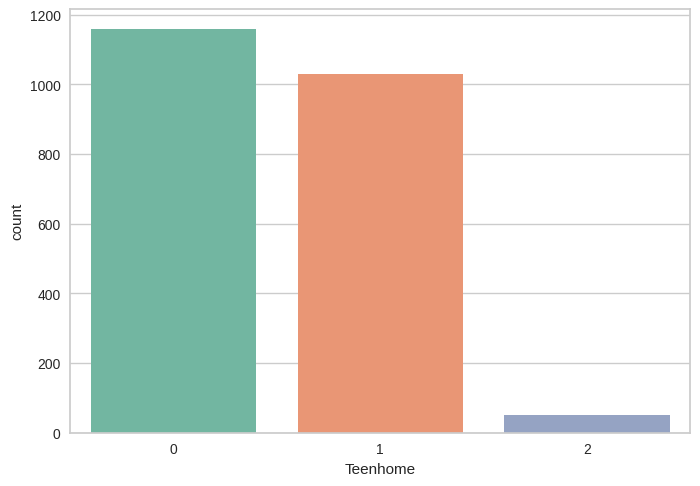

In [ ]:
sns.countplot(data, x = 'Teenhome', palette = 'Set2');

Customers have max 2 and min of 0 children at home.

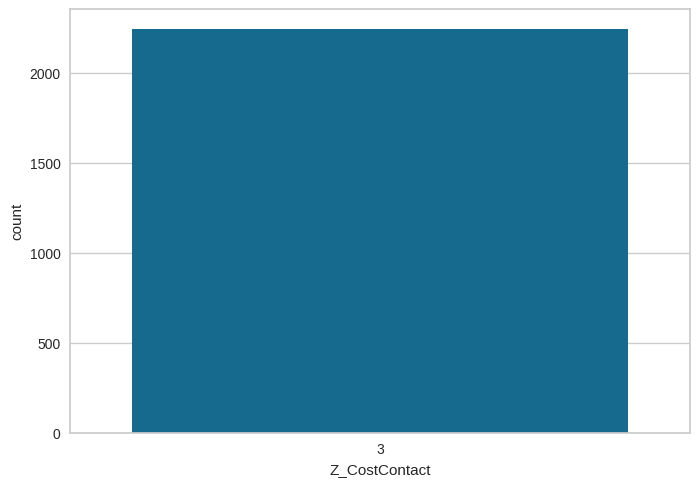

In [ ]:
sns.countplot(data, x='Z_CostContact');

<Axes: xlabel='Z_CostContact', ylabel='count'>

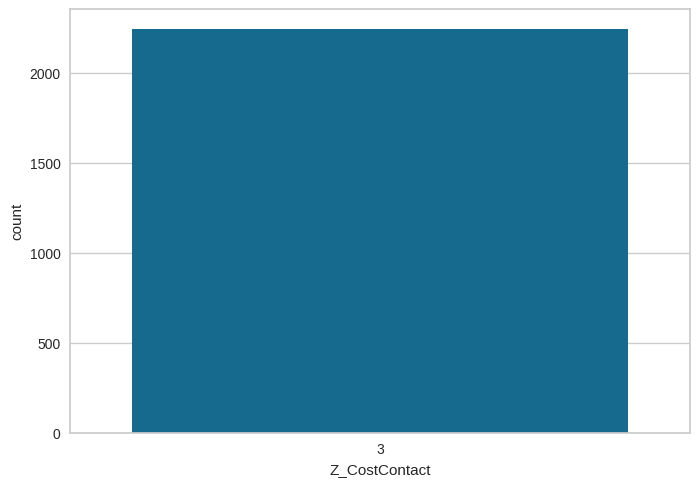

In [ ]:
sns.countplot(data,x='Z_CostContact')

In [ ]:
data['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [ ]:
data['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [ ]:
data[['Z_CostContact','Z_Revenue']].agg({'mean','max','min','median'})

,Z_CostContact,Z_Revenue
mean,3.0,11.0
median,3.0,11.0
max,3.0,11.0
min,3.0,11.0


Z_CostContact and Z_Revenue has all rows filled with the same value, so it is not helpful for any modeling, so possible to drop them

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


ID column is not a feature, so can drop it

<Axes: xlabel='Marital_Status'>

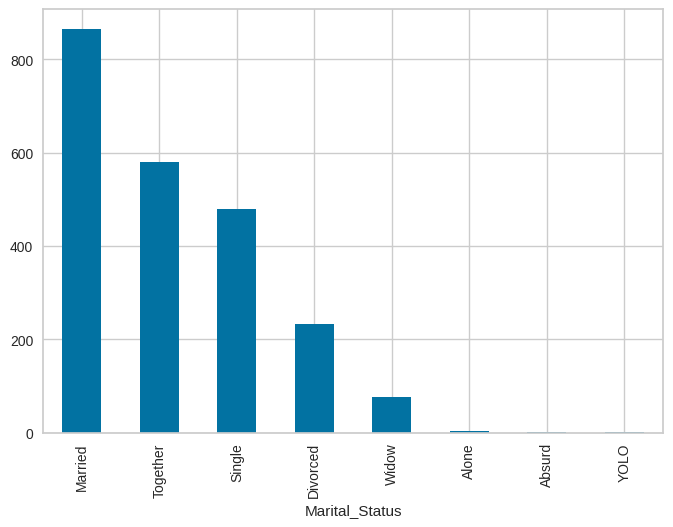

In [ ]:
data['Marital_Status'].value_counts().plot(kind='bar')

8 types of marital status with Married being the most

<Axes: xlabel='Income', ylabel='Education'>

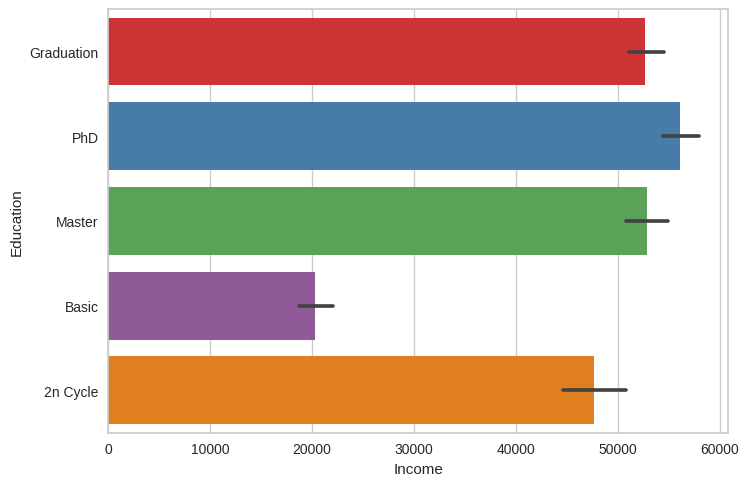

In [ ]:
sns.barplot(x='Income', y="Education", data=data, palette = 'Set1')

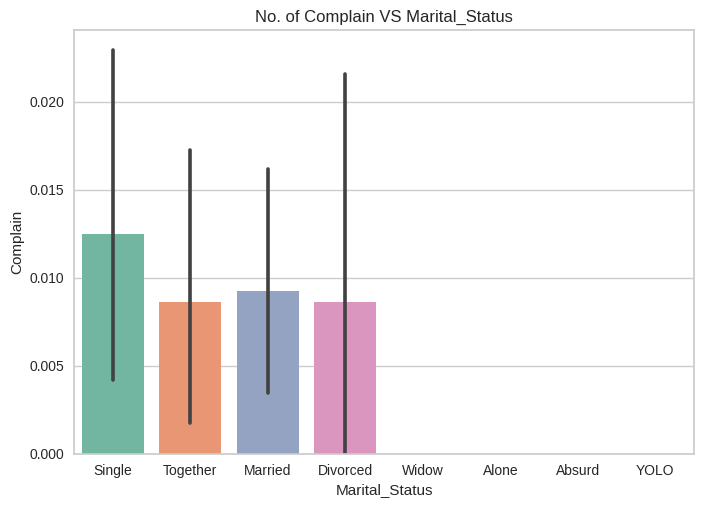

In [ ]:
sns.barplot(x = 'Marital_Status',y = 'Complain',data = data, palette = 'Set2')
plt.title('No. of Complain VS Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Complain')
plt.show()

<Axes: xlabel='Education', ylabel='NumWebPurchases'>

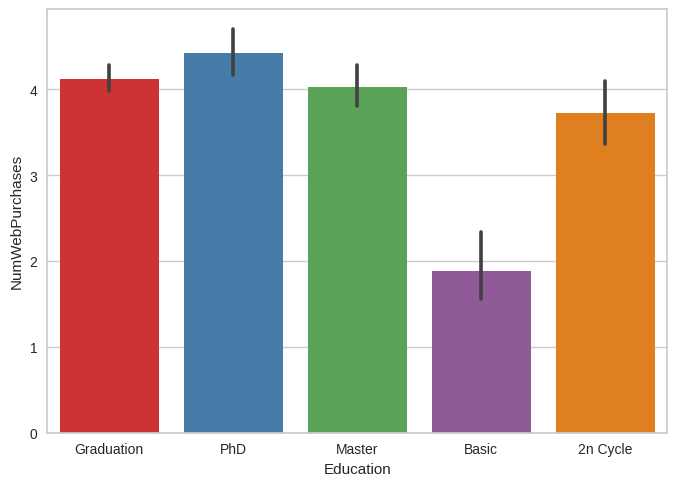

In [ ]:
sns.barplot(x='Education', y="NumWebPurchases",  data=data, palette = 'Set1')

<Axes: xlabel='Education', ylabel='NumCatalogPurchases'>

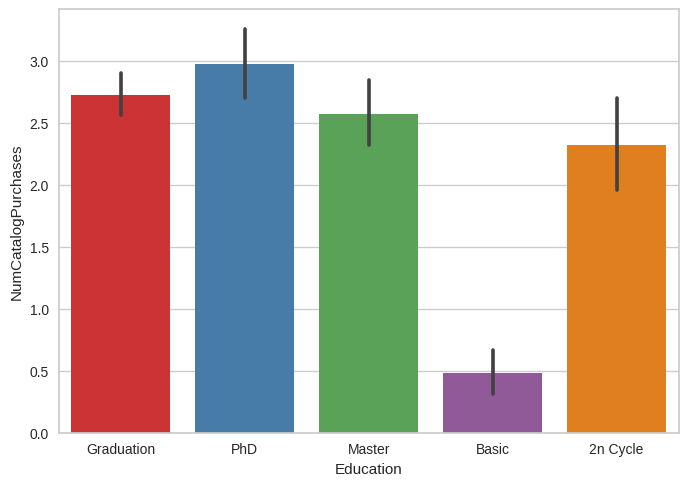

In [ ]:
sns.barplot(x='Education', y="NumCatalogPurchases",  data=data, palette = 'Set1')

In [ ]:
data['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [ ]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


No duplicated data

## DATA CLEANING



Dropping irrelvant columns from the dataframe

In [ ]:
data.drop(columns = ['ID'],axis = 1,inplace = True)
data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True)

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-null   i

In [ ]:
num_cols = ['Income', 'Recency','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
def KDE_plots(data,nrow,ncol,cols):
    fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14))
    fig.tight_layout(h_pad=4.0,w_pad=4.0)
    count = 0
    for i in range(nrow):
        for j in range(ncol):
            if count < len(num_cols):
                sns.kdeplot(data[num_cols[count]], ax=axes[i, j])
                count = count + 1
            else:
                break
    plt.show()

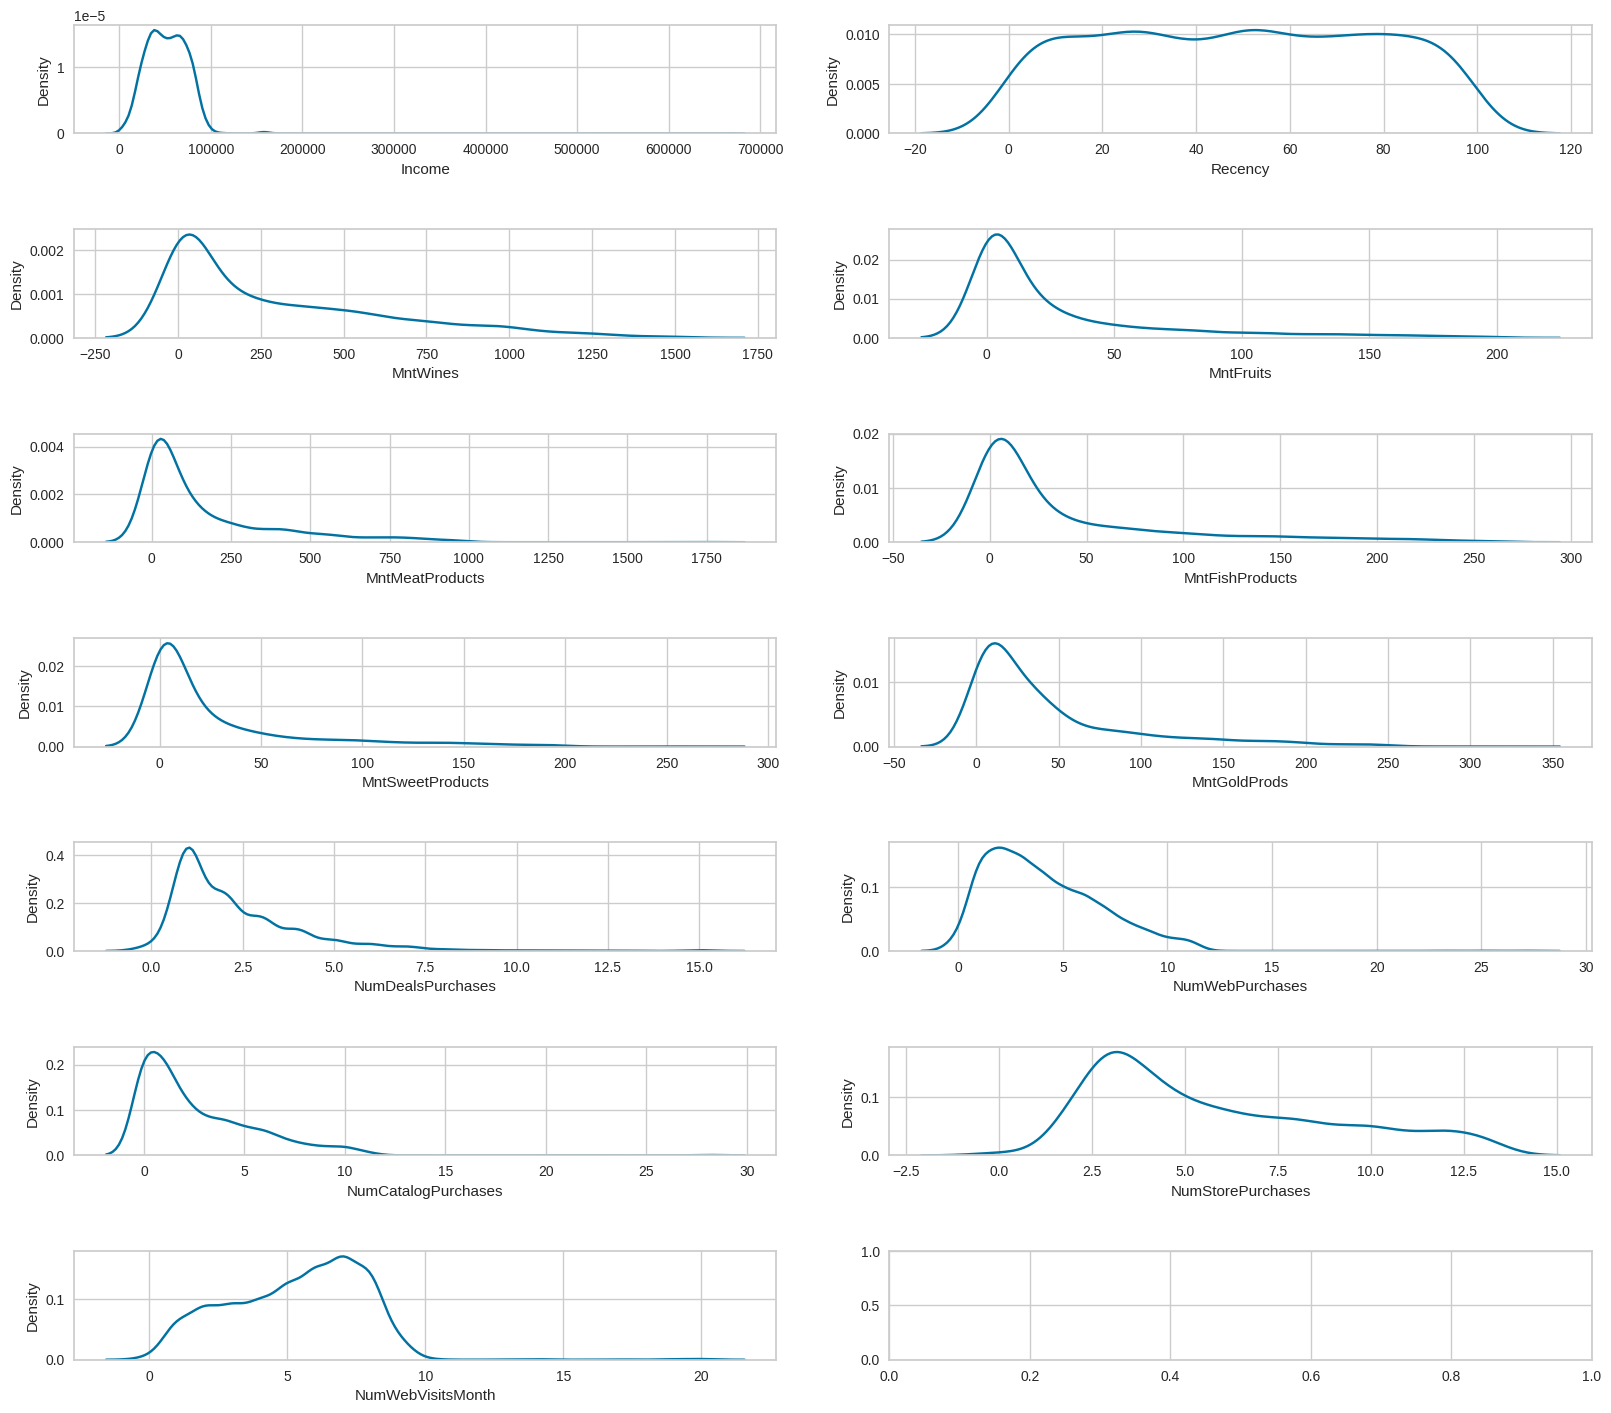

In [ ]:
KDE_plots(data,7,2,num_cols)

In [ ]:
zscore_thres = (-3,3)

for col in num_cols:
    data['zscore'] = stats.zscore(data[col])
    data = data[(data['zscore']>zscore_thres[0])&(data['zscore']<zscore_thres[1])]
    data.drop('zscore',axis=1,inplace=True)

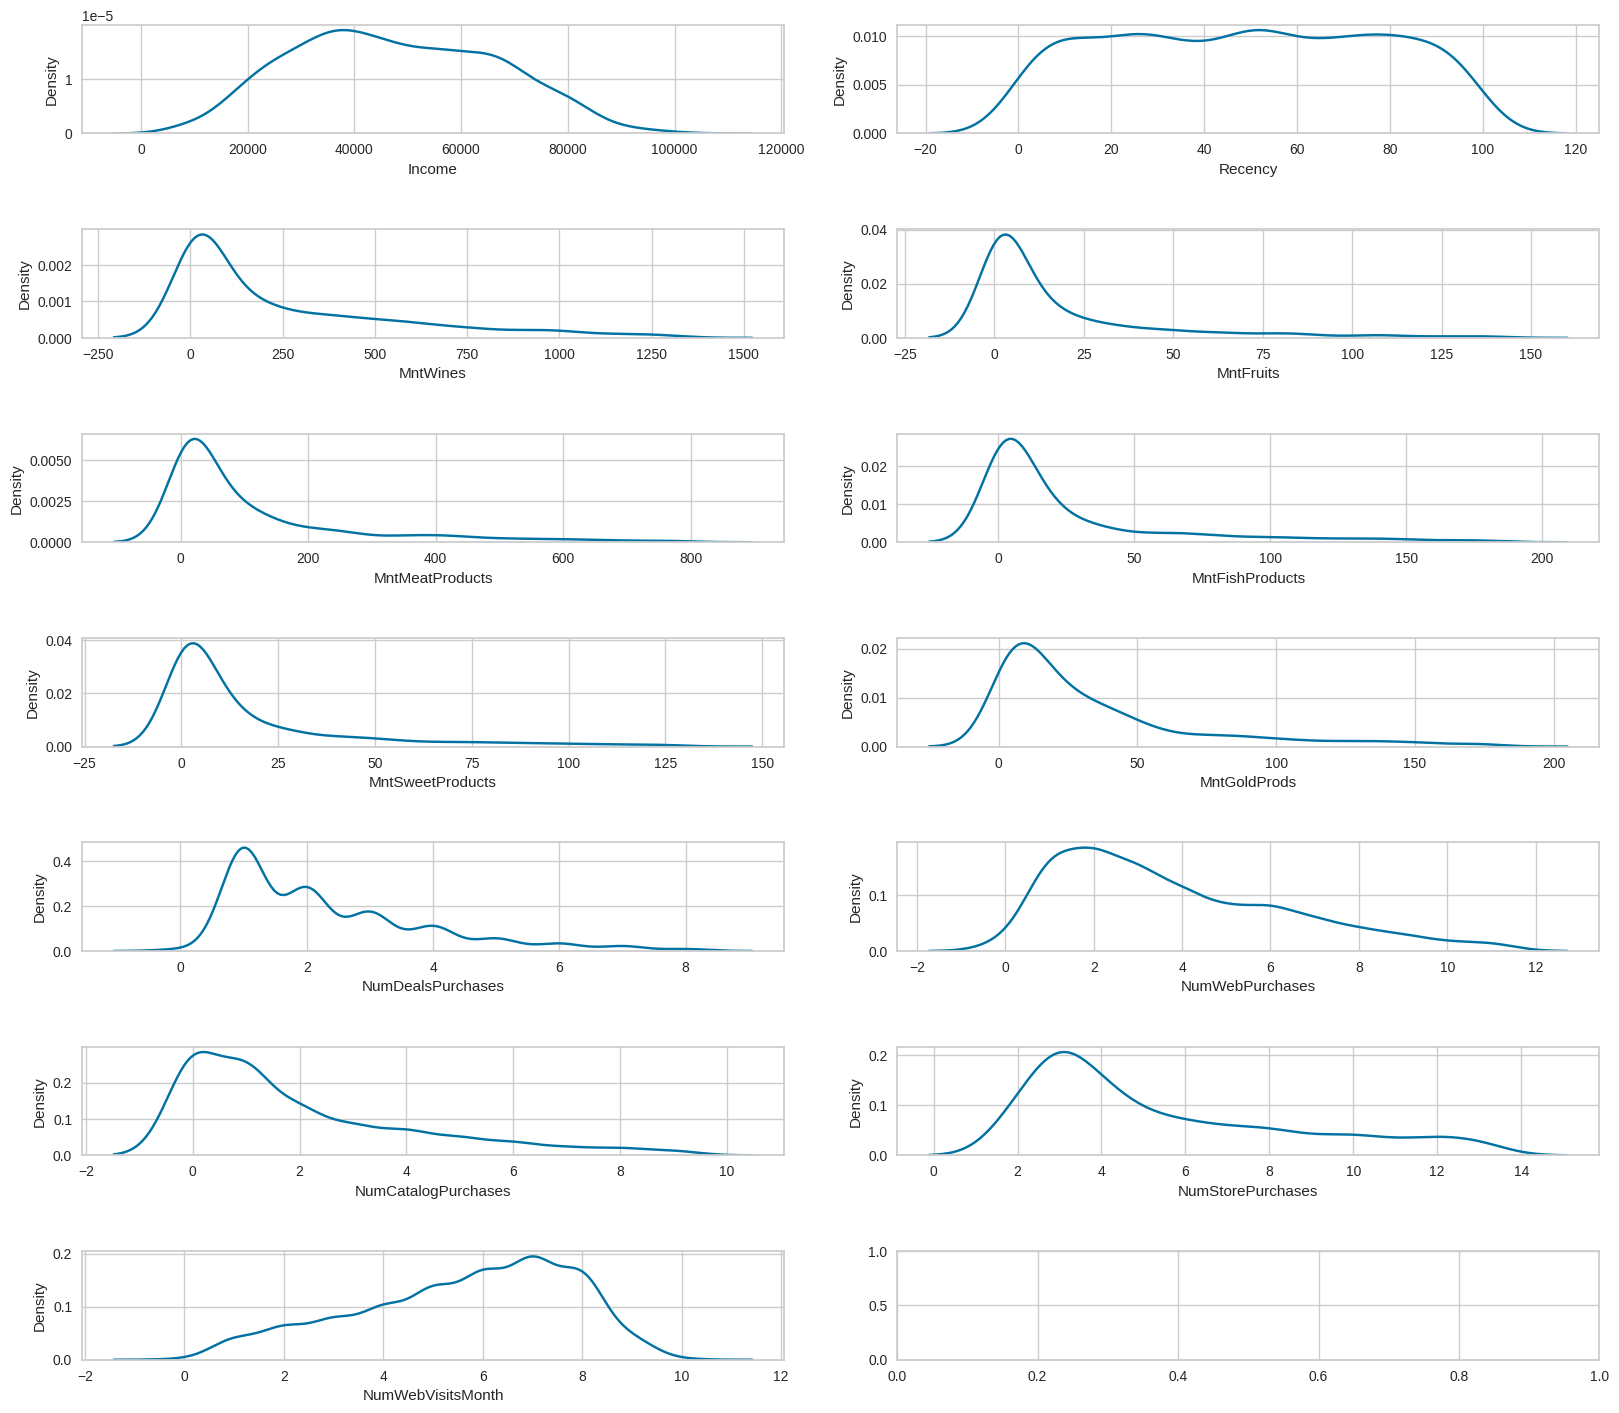

In [ ]:
KDE_plots(data,7,2,num_cols)

The extreme values of the features are treated as outliers and are excluded.

This has reduced our num of rows

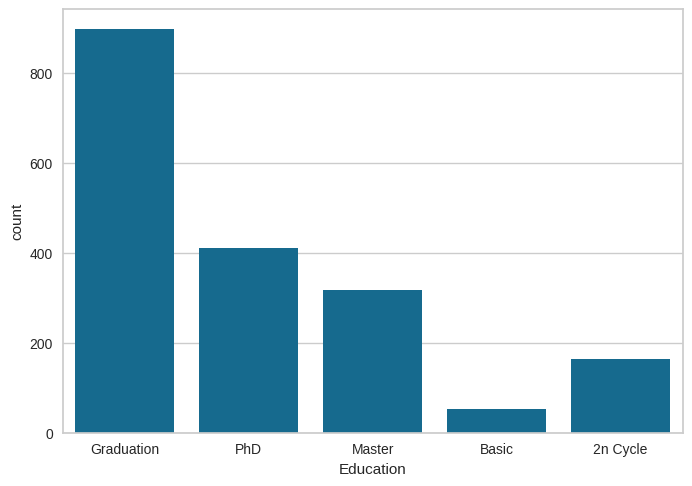

In [ ]:
sns.countplot(data=data,x='Education');

FEATURE ENGINEERING

Converting categorical feature 'Education'

In [ ]:
data['Education'].replace({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4},inplace=True)

In [ ]:
data['Education'].value_counts()

Education
2    896
4    410
3    318
1    163
0     53
Name: count, dtype: int64

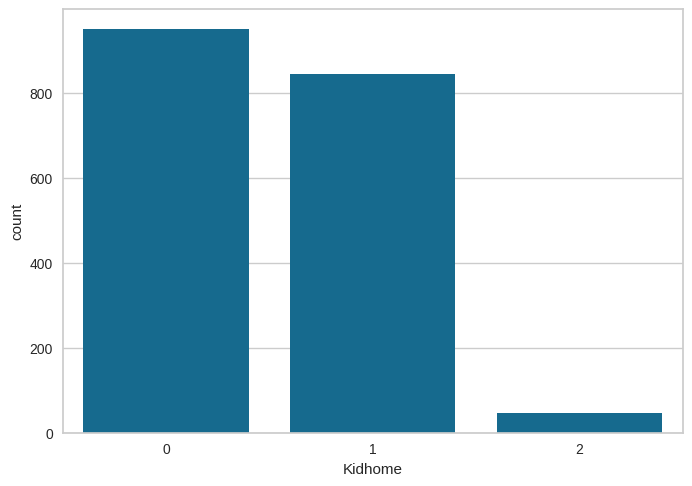

In [ ]:
sns.countplot(data=data,x='Kidhome');

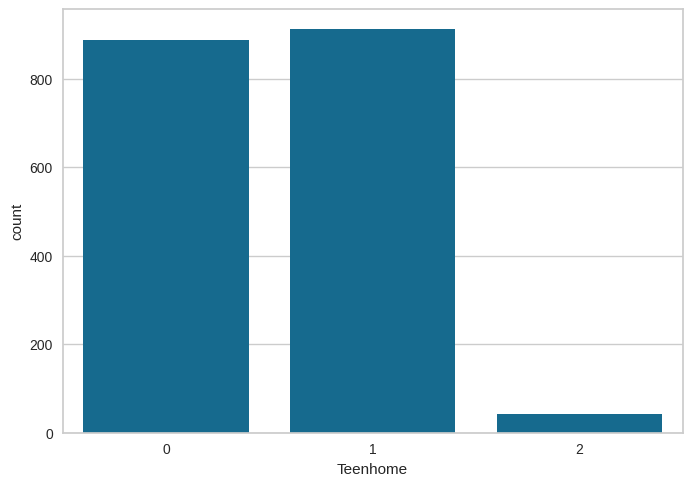

In [ ]:
sns.countplot(data=data, x='Teenhome');

As teenhome and kidhome features are very similar, we can merge them to be total number of kids of a customer

In [ ]:
data['num_kids'] = data['Kidhome'] + data['Teenhome']

In [ ]:
data.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

<Axes: ylabel='count'>

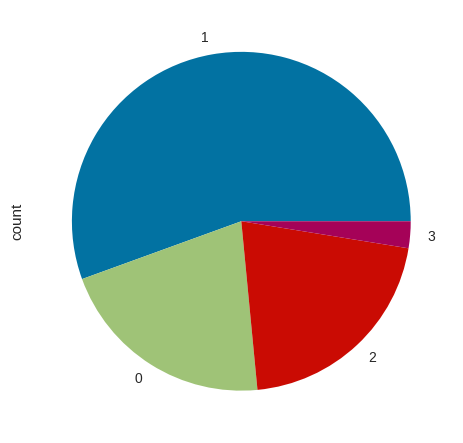

In [ ]:
data['num_kids'].value_counts().plot(kind="pie")

<Axes: xlabel='num_kids', ylabel='MntWines'>

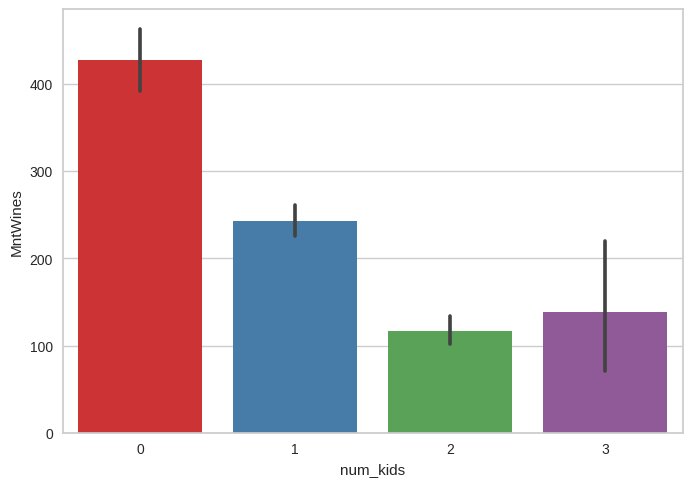

In [ ]:
sns.barplot(x='num_kids', y="MntWines",  data=data, palette = 'Set1')

<Axes: xlabel='num_kids', ylabel='MntFruits'>

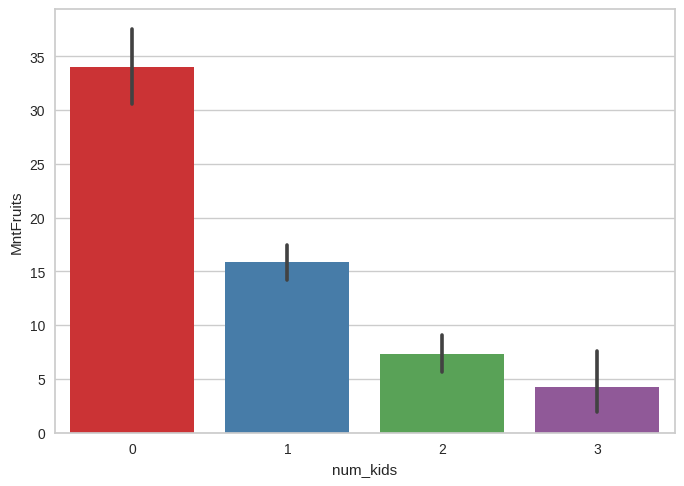

In [ ]:
sns.barplot(x='num_kids', y="MntFruits",  data=data, palette = "Set1")

In [ ]:
from datetime import datetime

# Convert 'Dt_Customer' column to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Calculate today's date
today = datetime.now()

# Calculate the difference between today and the enrollment date in days
data['Days Enrolled'] = (today - data['Dt_Customer']).dt.days

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,num_kids,Days Enrolled
1,1954,2,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3693
2,1965,2,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,3892
3,1984,2,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3719
4,1981,4,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3741
5,1967,3,Together,62513.0,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,1,3873


In [ ]:
current_year = datetime.now().year
# Calculate age by subtracting birth year from current year
data['Age'] = current_year - data['Year_Birth']

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,num_kids,Days Enrolled,Age
1,1954,2,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3693,70
2,1965,2,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,3892,59
3,1984,2,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3719,40
4,1981,4,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3741,43
5,1967,3,Together,62513.0,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,1,3873,57


In [ ]:
data.drop(columns = ['Dt_Customer','Year_Birth'], inplace = True)

In [ ]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,num_kids,Days Enrolled,Age
1,2,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3693,70
2,2,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,3892,59
3,2,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3719,40
4,4,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3741,43
5,3,Together,62513.0,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,1,3873,57


### Feature Engineering

5 columns represents if a customer accepted a particular campaign

we'll merge these to make total compaigns accepted

In [ ]:
data['total_cmp_accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)

new feature total_amt_spent for the total amount on different items

In [ ]:
data['total_amt_spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

a new feature total_purchases by adding deals, store, catalog and web purchases

In [ ]:
data['total_purchases'] = data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+ data['NumStorePurchases']

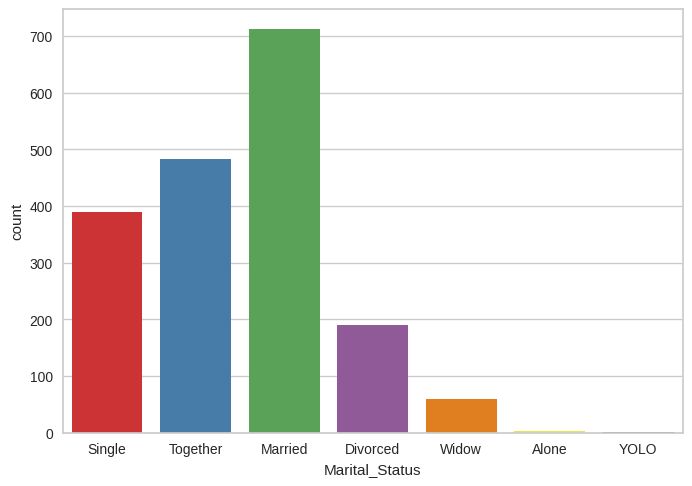

In [ ]:
sns.countplot(data=data,x='Marital_Status', palette = 'Set1');

Converting categorical feature 'Marital Status' string values to dummy variables since there is no order for this feature

In [ ]:
data['Marital_Status'].replace(['Married','Together'],'Together',inplace=True)
data['Marital_Status'].replace(['Single','Alone'],'Single',inplace=True)
data['Marital_Status'].replace(['Divorced','Widow'],'Was_married',inplace=True)

since absurd and yolo types don't go with any one of the above categories, and since they are very small in number, we can drop them

In [ ]:
data = data.drop(data[data['Marital_Status'].isin(['Absurd', 'YOLO'])].index)

In [ ]:
le = LabelEncoder()

In [ ]:
data['Marital_Status'] = data[['Marital_Status']].apply(le.fit_transform)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 1 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1838 non-null   int64  
 1   Marital_Status       1838 non-null   int64  
 2   Income               1838 non-null   float64
 3   Recency              1838 non-null   int64  
 4   MntWines             1838 non-null   int64  
 5   MntFruits            1838 non-null   int64  
 6   MntMeatProducts      1838 non-null   int64  
 7   MntFishProducts      1838 non-null   int64  
 8   MntSweetProducts     1838 non-null   int64  
 9   MntGoldProds         1838 non-null   int64  
 10  NumDealsPurchases    1838 non-null   int64  
 11  NumWebPurchases      1838 non-null   int64  
 12  NumCatalogPurchases  1838 non-null   int64  
 13  NumStorePurchases    1838 non-null   int64  
 14  NumWebVisitsMonth    1838 non-null   int64  
 15  Complain             1838 non-null   int64 

In [ ]:
data.drop(columns = ['Response', 'Days Enrolled', 'Age', 'Complain', 'Recency'], axis = 1, inplace = True)

In [ ]:
data.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases
1,2,0,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,0,27,6
2,2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,776,21
3,2,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,0,53,8
4,4,1,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,0,422,19
5,3,1,62513.0,520,42,98,0,42,14,2,6,4,10,6,1,0,716,22


In [ ]:
data.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases
count,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,2.470620,0.922742,47645.024483,252.455930,17.602285,112.689880,25.195321,17.320457,33.133841,2.321545,3.792709,1.992383,5.450490,5.619695,1.050598,0.225245,458.397715,13.557127
std,1.021786,0.586098,18892.343157,311.252937,27.368653,156.876787,37.990622,26.186533,37.594628,1.578807,2.584660,2.216371,3.157367,2.128067,0.720753,0.571863,503.206272,7.286556
min,0.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,4.000000
25%,2.000000,1.000000,33238.500000,18.000000,1.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000,0.000000,58.000000,7.000000
50%,2.000000,1.000000,46190.000000,104.000000,6.000000,43.000000,8.000000,6.000000,19.000000,2.000000,3.000000,1.000000,4.000000,6.000000,1.000000,0.000000,235.000000,12.000000
75%,3.000000,1.000000,62510.500000,398.750000,21.000000,137.000000,29.750000,21.000000,43.000000,3.000000,6.000000,3.000000,7.000000,7.000000,1.000000,0.000000,776.750000,20.000000
max,4.000000,2.000000,101970.000000,1315.000000,142.000000,792.000000,184.000000,130.000000,180.000000,8.000000,11.000000,9.000000,13.000000,10.000000,3.000000,4.000000,2440.000000,35.000000


DATA PREPROCESSING



## Transforming raw data into standarized format, so that all features would be on a similar scale

In [ ]:
data1 = data.copy()

In [ ]:
data1

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases
1,2,0,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,0,27,6
2,2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,776,21
3,2,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,0,53,8
4,4,1,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,0,422,19
5,3,1,62513.0,520,42,98,0,42,14,2,6,4,10,6,1,0,716,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2,1,34421.0,3,3,7,6,2,9,1,1,0,2,7,1,0,30,4
2236,4,1,64014.0,406,0,30,0,0,8,7,8,2,5,7,3,1,444,22
2237,2,2,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,1,1241,19
2238,3,1,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,0,843,23


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data1.to_numpy())
scaled_df = pd.DataFrame(scaled, columns= data1.columns)

In [ ]:
scaled_df.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases
0,-0.460711,-1.574811,-0.068884,-0.775966,-0.606782,-0.680272,-0.610720,-0.623408,-0.721944,-0.203719,-1.080788,-0.447873,-1.093135,-0.291280,1.317594,-0.393986,-0.857531,-1.037415
1,-0.460711,0.131853,1.269006,0.557718,1.147527,0.091244,2.259190,0.140551,0.235900,-0.837281,1.628235,0.003438,1.441311,-0.761318,-1.458036,-0.393986,0.631329,1.021731
2,-0.460711,0.131853,-1.111812,-0.775966,-0.497138,-0.591006,-0.400084,-0.547012,-0.748551,-0.203719,-0.693785,-0.899184,-0.459523,0.178758,-0.070221,-0.393986,-0.805849,-0.762862
3,1.497179,0.131853,0.563767,-0.255347,0.928238,0.033858,0.547776,0.369739,-0.482483,1.696967,0.467225,0.454748,0.174088,-0.291280,-0.070221,-0.393986,-0.072351,0.747178
4,0.518234,0.131853,0.787198,0.859805,0.891690,-0.093665,-0.663379,0.942708,-0.509090,-0.203719,0.854229,0.906059,1.441311,0.178758,-0.070221,-0.393986,0.512061,1.159007


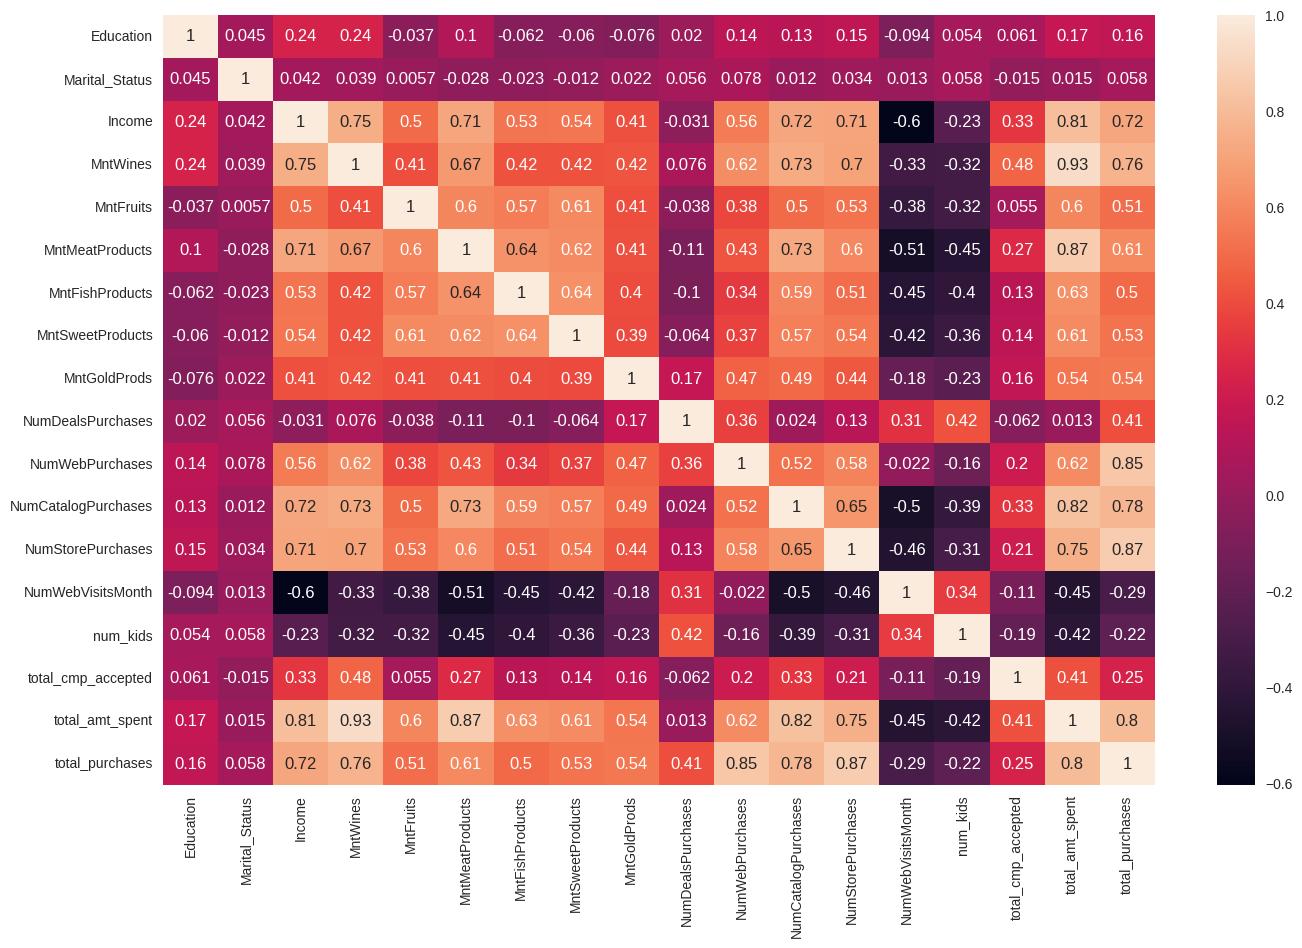

In [ ]:
plt.figure(figsize=((16,10)))
sns.heatmap(scaled_df.corr(),annot=True);

## Dimensionality reduction with PCA

In [ ]:
pca = PCA()
pca_transformed = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(pca_transformed, index=scaled_df.index)
df_pca.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.60,-0.60,0.08,0.19,-1.57,1.27,0.25,0.12,0.22,0.43,0.24,-0.06,-0.32,-0.21,-0.18,0.17,0.0,-0.0
1,3.10,-0.84,-0.86,-0.38,0.21,-0.96,0.06,-1.04,0.19,-0.18,0.96,1.98,-0.08,0.27,-0.35,0.13,-0.0,0.0
2,-2.41,-0.54,-0.25,-0.03,0.23,-0.13,-0.03,-0.46,-0.07,-0.11,-0.21,0.10,0.18,0.12,0.07,-0.29,0.0,-0.0
3,1.07,1.12,-0.05,-1.39,-0.81,-0.30,-0.73,0.05,-0.66,-0.77,-0.90,0.32,-0.69,-0.01,-0.20,0.49,0.0,0.0
4,2.01,0.74,0.28,-0.75,-0.30,-0.57,-0.51,-0.93,1.01,-0.39,0.40,-0.73,0.30,-0.84,-0.02,0.29,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,-2.90,-1.06,-0.02,0.16,0.41,-0.20,-0.13,0.11,0.13,0.32,0.13,-0.04,0.10,0.02,-0.12,0.27,0.0,0.0
1834,0.05,4.53,1.46,-0.25,-0.74,1.53,-0.91,0.14,-0.32,-0.36,0.02,0.39,-0.90,0.19,-0.08,0.03,-0.0,0.0
1835,2.94,-0.57,1.14,0.36,2.25,-0.27,-0.36,-1.15,1.13,0.06,-1.01,0.35,2.14,-0.23,-0.07,0.33,0.0,0.0
1836,3.34,-0.01,-0.11,-1.06,-0.38,0.07,0.67,-0.18,-0.44,0.01,0.50,0.60,0.08,-0.47,0.27,-0.10,0.0,0.0


Plotting the reduced dataframe


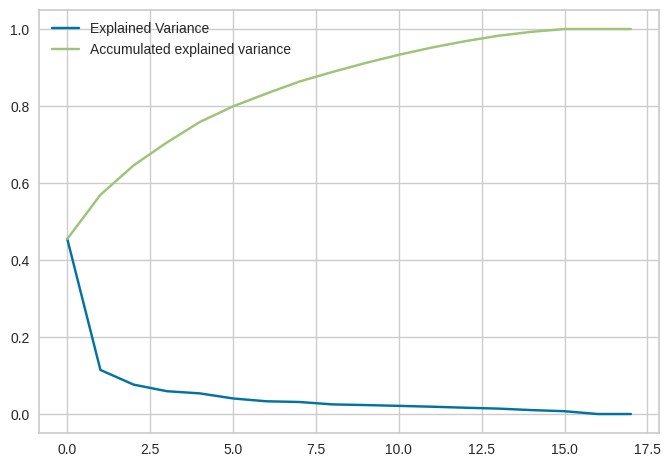

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance,label='Explained Variance')
plt.plot(np.add.accumulate(explained_variance),label='Accumulated explained variance')
plt.legend()

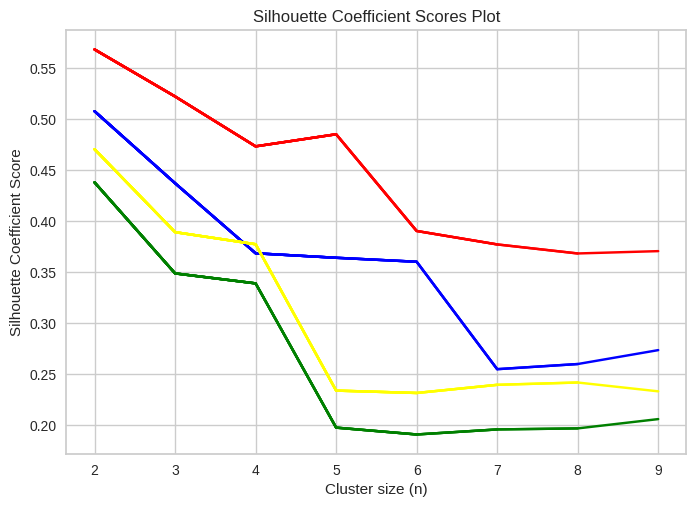

In [ ]:
colors = ['red','blue','yellow','green']
for n in range(2,6):
    X = df_pca.iloc[:,:n]
    KMeansSihouettePlot(X, 10,color=colors[n-2])

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PC1","PC2"])
pca_df

,PC1,PC2
0,-2.599130,-0.594968
1,3.101144,-0.836688
2,-2.409954,-0.539598
3,1.066776,1.118345
4,2.007728,0.737659
...,...,...
1833,-2.897506,-1.056664
1834,0.053622,4.525648
1835,2.935155,-0.571126
1836,3.337929,-0.008802


CLUSTERING

## Kmeans on PCA

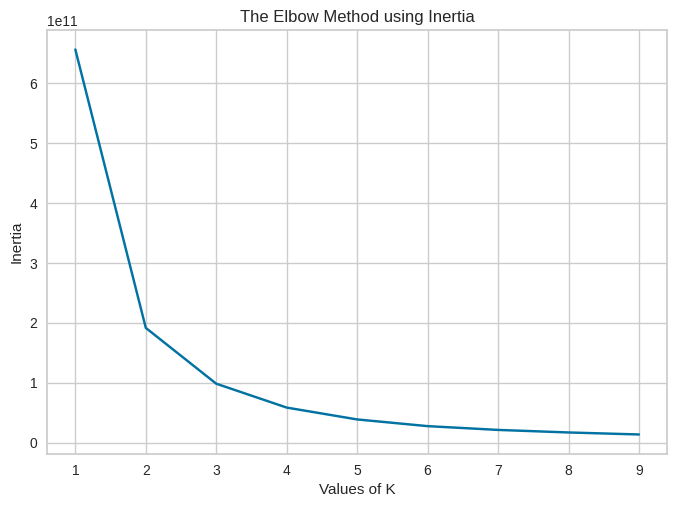

In [ ]:
from sklearn.cluster import KMeans

inertia = []
range_val = range(1,10)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(data1))#pca_df
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(1,10),inertia,curve="convex",direction="decreasing")

kl.elbow

3

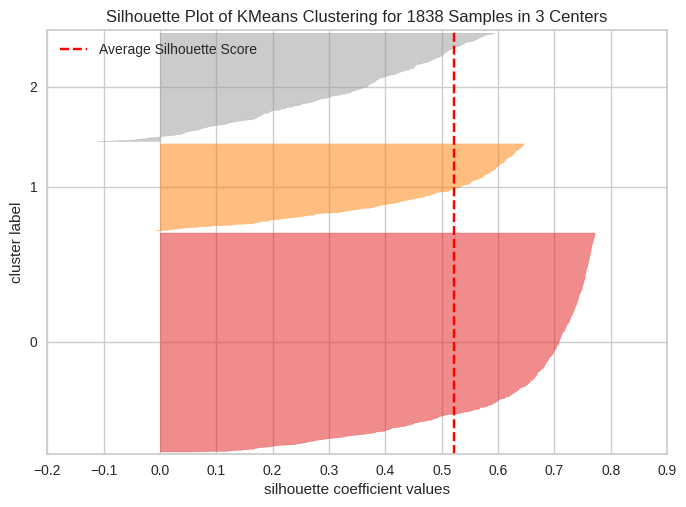

In [ ]:
X = pca_df
kmeans = getKMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X)
sihouetteVisualizer(X, kmeans)

In [ ]:
X['Cluster'] = cluster_labels
X

,PC1,PC2,Cluster
0,-2.599130,-0.594968,0
1,3.101144,-0.836688,1
2,-2.409954,-0.539598,0
3,1.066776,1.118345,2
4,2.007728,0.737659,2
...,...,...,...
1833,-2.897506,-1.056664,0
1834,0.053622,4.525648,2
1835,2.935155,-0.571126,1
1836,3.337929,-0.008802,1


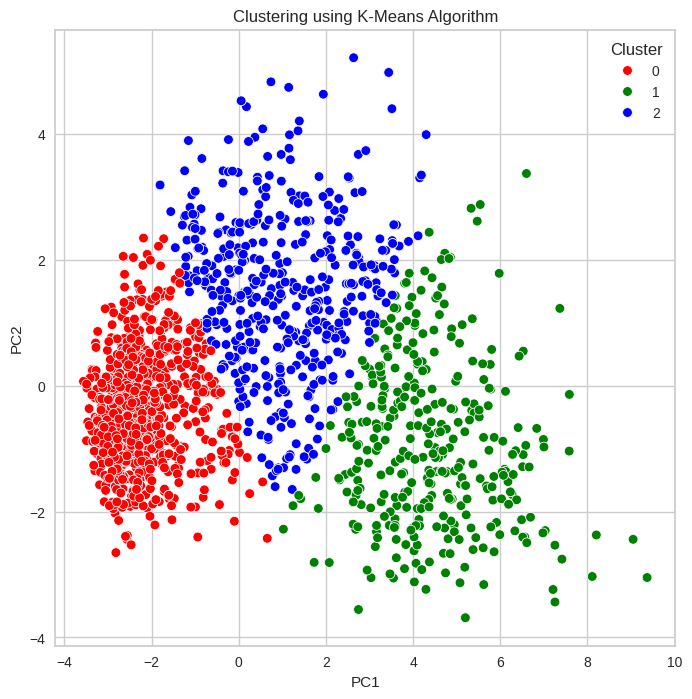

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PC1",y="PC2",hue="Cluster",data=X,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

print(silhouette_score(X, cluster_labels))
print(calinski_harabasz_score(X, cluster_labels))
print(davies_bouldin_score(X, cluster_labels))

0.5704093891260741
3485.3370574466257
0.723535992637722


## Agglomerative Clustering

In [ ]:
pca_df = pca_df.drop(columns = {'Cluster'})

In [ ]:
pca_df

,PC1,PC2
0,-2.599130,-0.594968
1,3.101144,-0.836688
2,-2.409954,-0.539598
3,1.066776,1.118345
4,2.007728,0.737659
...,...,...
1833,-2.897506,-1.056664
1834,0.053622,4.525648
1835,2.935155,-0.571126
1836,3.337929,-0.008802


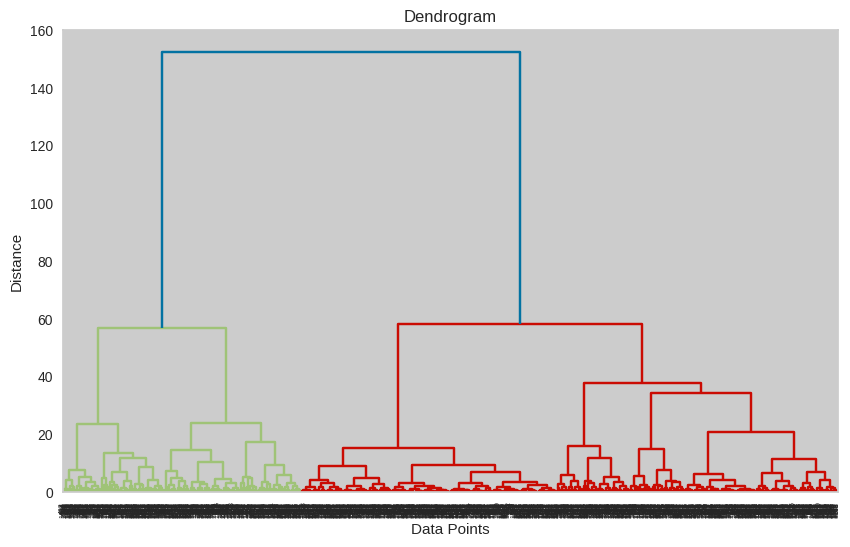

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

pca_array = np.array(pca_df)
linkage_matrix = linkage(pca_array, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

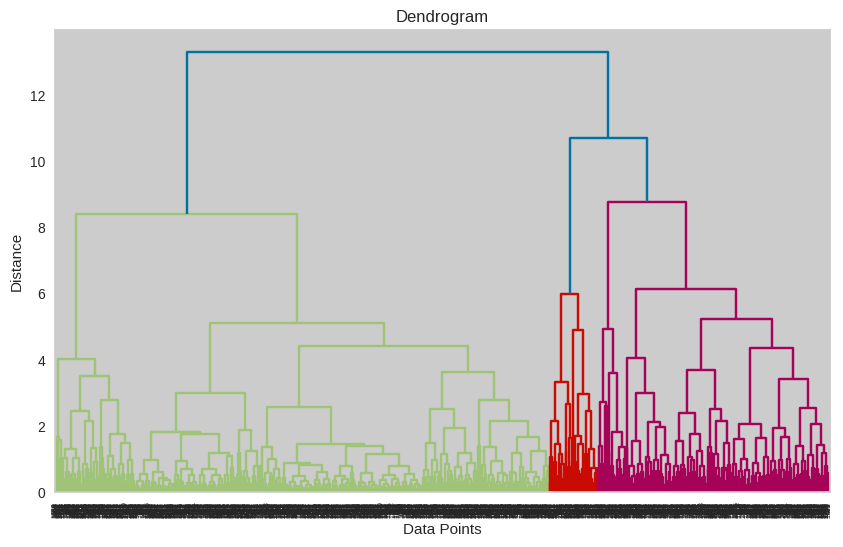

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

pca_array = np.array(pca_df)
linkage_matrix = linkage(pca_array, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [ ]:
pca_df_agglo = pca_df
pca_df_agglo.head()

,PC1,PC2
0,-2.599130,-0.594968
1,3.101144,-0.836688
2,-2.409954,-0.539598
3,1.066776,1.118345
4,2.007728,0.737659


In [ ]:
pca_array_agglo = np.array(pca_df_agglo)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(pca_array_agglo)
labels = pd.DataFrame(agg_labels)

In [ ]:
pca_df_agglo['ClusterID'] = labels
pca_df_agglo

,PC1,PC2,ClusterID
0,-2.599130,-0.594968,0
1,3.101144,-0.836688,1
2,-2.409954,-0.539598,0
3,1.066776,1.118345,1
4,2.007728,0.737659,1
...,...,...,...
1833,-2.897506,-1.056664,0
1834,0.053622,4.525648,0
1835,2.935155,-0.571126,1
1836,3.337929,-0.008802,1


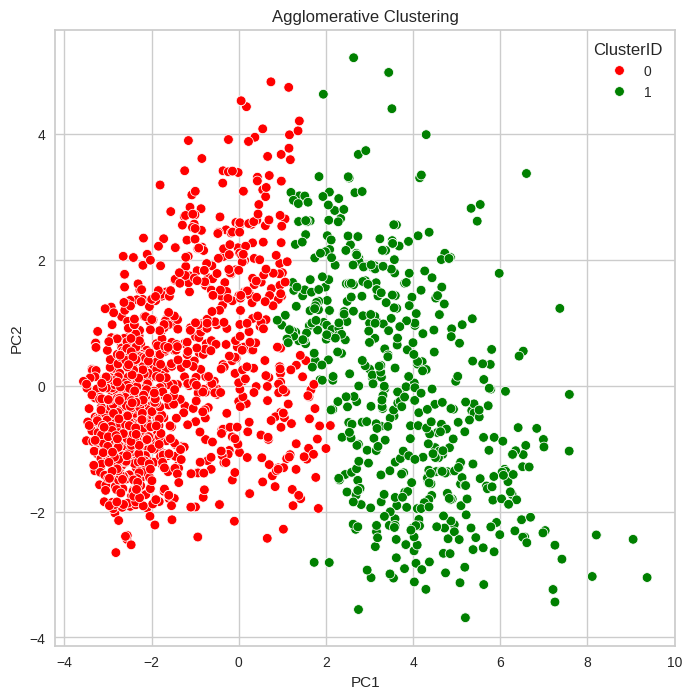

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PC1",y="PC2",hue="ClusterID",data=pca_df_agglo,palette=['red','green','blue'])
plt.title("Agglomerative Clustering")
plt.show()

In [ ]:
print(silhouette_score(pca_df, agg_labels))
print(calinski_harabasz_score(pca_df, agg_labels))
print(davies_bouldin_score(pca_df, agg_labels))

0.5716830505182207
3049.7614370309043
0.6660111360652787


In [ ]:
pca_df = pca_df.drop(columns = {'ClusterID'})

In [ ]:
n_clusters_range = [2, 3]
linkage_methods = ['ward', 'complete', 'average']

#Looping
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
        linkage=linkage)
        agg_labels = agg_clustering.fit_predict(pca_array_agglo)

        # Calculate silhouette score
        silhouette = silhouette_score(pca_df, agg_labels)

        # Print evaluation scores
        print(f"Number of clusters:{n_clusters},Linkage method:{linkage},Silhouette Score: {silhouette}")


Number of clusters:2,Linkage method:ward,Silhouette Score: 0.5621860705782944
Number of clusters:2,Linkage method:complete,Silhouette Score: 0.5439466931129808
Number of clusters:2,Linkage method:average,Silhouette Score: 0.5377052301416286
Number of clusters:3,Linkage method:ward,Silhouette Score: 0.3706974617948852
Number of clusters:3,Linkage method:complete,Silhouette Score: 0.4530324385268515
Number of clusters:3,Linkage method:average,Silhouette Score: 0.5101305566892828


## DBSCAN

In [ ]:
dbscan_df = pca_df
dbscan_df

,PC1,PC2
0,-2.599130,-0.594968
1,3.101144,-0.836688
2,-2.409954,-0.539598
3,1.066776,1.118345
4,2.007728,0.737659
...,...,...
1833,-2.897506,-1.056664
1834,0.053622,4.525648
1835,2.935155,-0.571126
1836,3.337929,-0.008802


In [ ]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=1, min_samples=5)
dbscan_labels_1 = dbscan_1.fit_predict(dbscan_df)

In [ ]:
dbscan_df['Clusterid'] = dbscan_labels_1
dbscan_df

,PC1,PC2,Clusterid
0,-2.599130,-0.594968,0
1,3.101144,-0.836688,0
2,-2.409954,-0.539598,0
3,1.066776,1.118345,0
4,2.007728,0.737659,0
...,...,...,...
1833,-2.897506,-1.056664,0
1834,0.053622,4.525648,0
1835,2.935155,-0.571126,0
1836,3.337929,-0.008802,0


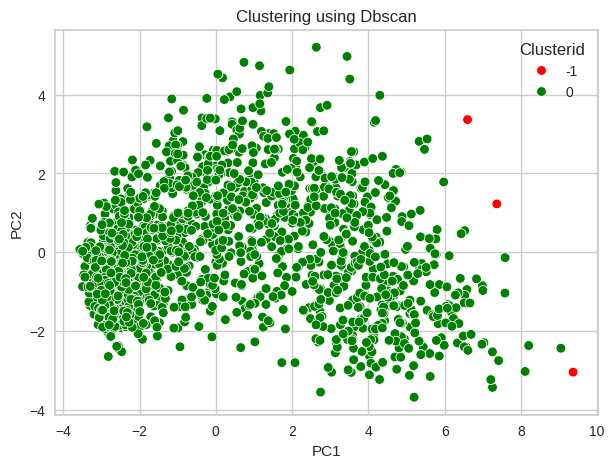

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.scatterplot(x="PC1",y="PC2",hue="Clusterid",data=dbscan_df,palette=['red','green','blue', 'yellow','orange','grey'])
plt.title("Clustering using Dbscan")
plt.show()

In [ ]:
dbscan_df = dbscan_df.drop(columns = {'Clusterid'})
dbscan_df

,PC1,PC2
0,-2.599130,-0.594968
1,3.101144,-0.836688
2,-2.409954,-0.539598
3,1.066776,1.118345
4,2.007728,0.737659
...,...,...
1833,-2.897506,-1.056664
1834,0.053622,4.525648
1835,2.935155,-0.571126
1836,3.337929,-0.008802


In [ ]:
for eps in [0.1, 0.5, 1.0]:
    for min_samples in [5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels3 = dbscan.fit_predict(dbscan_df)
        # Evaluate clustering using silhouette score
        silhouette_avg = silhouette_score(dbscan_df, cluster_labels3)
        print(f"For eps={eps} and min_samples={min_samples}, silhouette score: {silhouette_avg}")

For eps=0.1 and min_samples=5, silhouette score: -0.520138739666029
For eps=0.1 and min_samples=10, silhouette score: -0.1538761101617868
For eps=0.5 and min_samples=5, silhouette score: 0.3917377845428507
For eps=0.5 and min_samples=10, silhouette score: 0.3463512181982281
For eps=1.0 and min_samples=5, silhouette score: 0.47241750760007584
For eps=1.0 and min_samples=10, silhouette score: 0.4246038856412276


## Classification Models

In [ ]:
data1['Cluster'] = cluster_labels
data1

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases,Cluster
1,2,0,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,0,27,6,0
2,2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,776,21,1
3,2,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,0,53,8,0
4,4,1,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,0,422,19,2
5,3,1,62513.0,520,42,98,0,42,14,2,6,4,10,6,1,0,716,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2,1,34421.0,3,3,7,6,2,9,1,1,0,2,7,1,0,30,4,0
2236,4,1,64014.0,406,0,30,0,0,8,7,8,2,5,7,3,1,444,22,2
2237,2,2,56981.0,908,48,217,32,12,24,1,2,3,13,6,0,1,1241,19,1
2238,3,1,69245.0,428,30,214,80,30,61,2,6,5,10,3,1,0,843,23,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 1 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1838 non-null   int64  
 1   Marital_Status       1838 non-null   int64  
 2   Income               1838 non-null   float64
 3   MntWines             1838 non-null   int64  
 4   MntFruits            1838 non-null   int64  
 5   MntMeatProducts      1838 non-null   int64  
 6   MntFishProducts      1838 non-null   int64  
 7   MntSweetProducts     1838 non-null   int64  
 8   MntGoldProds         1838 non-null   int64  
 9   NumDealsPurchases    1838 non-null   int64  
 10  NumWebPurchases      1838 non-null   int64  
 11  NumCatalogPurchases  1838 non-null   int64  
 12  NumStorePurchases    1838 non-null   int64  
 13  NumWebVisitsMonth    1838 non-null   int64  
 14  num_kids             1838 non-null   int64  
 15  total_cmp_accepted   1838 non-null   int64 

In [ ]:
x = data1.iloc[:,0:18]
y = data1.iloc[:,18]
print(x.shape)
print(y.shape)

(1838, 18)
(1838,)


## Train and Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(x_train, y_train)

In [ ]:
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.85


## Grid Search for SVC

In [ ]:
param_grid = {
    'kernel': ['poly', 'linear'],
    'gamma': [0.1, 0.01],
    'C': [10, 1, 0.1]
}

svm_clf = SVC()

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=10)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy of the best model:", test_accuracy)

## Different Models and Scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

models = {
    "RandomForest": RandomForestClassifier(criterion="entropy"),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion="entropy"),
    "NaiveBayes": GaussianNB(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=10, learning_rate=0.1),
    "LogisticRegression": LogisticRegression()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

RandomForest Accuracy: 0.9565217391304348
DecisionTreeClassifier Accuracy: 0.9326086956521739
NaiveBayes Accuracy: 0.9434782608695652
GradientBoosting Accuracy: 0.9630434782608696
XGBoost Accuracy: 0.941304347826087
LogisticRegression Accuracy: 0.8760869565217392


In [ ]:
final_model = GradientBoostingClassifier()

In [ ]:
final_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_final = final_model.predict(x_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

In [ ]:
accuracy_final

0.9630434782608696

### Saving the model

In [ ]:
from pickle import dump

In [ ]:
dump(final_model,open('final.pkl','wb'))

In [ ]:
data1.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases,Cluster
count,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000,1838.000000
mean,2.470620,0.922742,47645.024483,252.455930,17.602285,112.689880,25.195321,17.320457,33.133841,2.321545,3.792709,1.992383,5.450490,5.619695,1.050598,0.225245,458.397715,13.557127,0.732862
std,1.021786,0.586098,18892.343157,311.252937,27.368653,156.876787,37.990622,26.186533,37.594628,1.578807,2.584660,2.216371,3.157367,2.128067,0.720753,0.571863,503.206272,7.286556,0.848270
min,0.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,4.000000,0.000000
25%,2.000000,1.000000,33238.500000,18.000000,1.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000,0.000000,58.000000,7.000000,0.000000
50%,2.000000,1.000000,46190.000000,104.000000,6.000000,43.000000,8.000000,6.000000,19.000000,2.000000,3.000000,1.000000,4.000000,6.000000,1.000000,0.000000,235.000000,12.000000,0.000000
75%,3.000000,1.000000,62510.500000,398.750000,21.000000,137.000000,29.750000,21.000000,43.000000,3.000000,6.000000,3.000000,7.000000,7.000000,1.000000,0.000000,776.750000,20.000000,2.000000
max,4.000000,2.000000,101970.000000,1315.000000,142.000000,792.000000,184.000000,130.000000,180.000000,8.000000,11.000000,9.000000,13.000000,10.000000,3.000000,4.000000,2440.000000,35.000000,2.000000


In [ ]:
data1.head()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_kids,total_cmp_accepted,total_amt_spent,total_purchases,Cluster
1,2,0,46344.0,11,1,6,2,1,6,2,1,1,2,5,2,0,27,6,0
2,2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,776,21,1
3,2,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,1,0,53,8,0
4,4,1,58293.0,173,43,118,46,27,15,5,5,3,6,5,1,0,422,19,2
5,3,1,62513.0,520,42,98,0,42,14,2,6,4,10,6,1,0,716,22,2


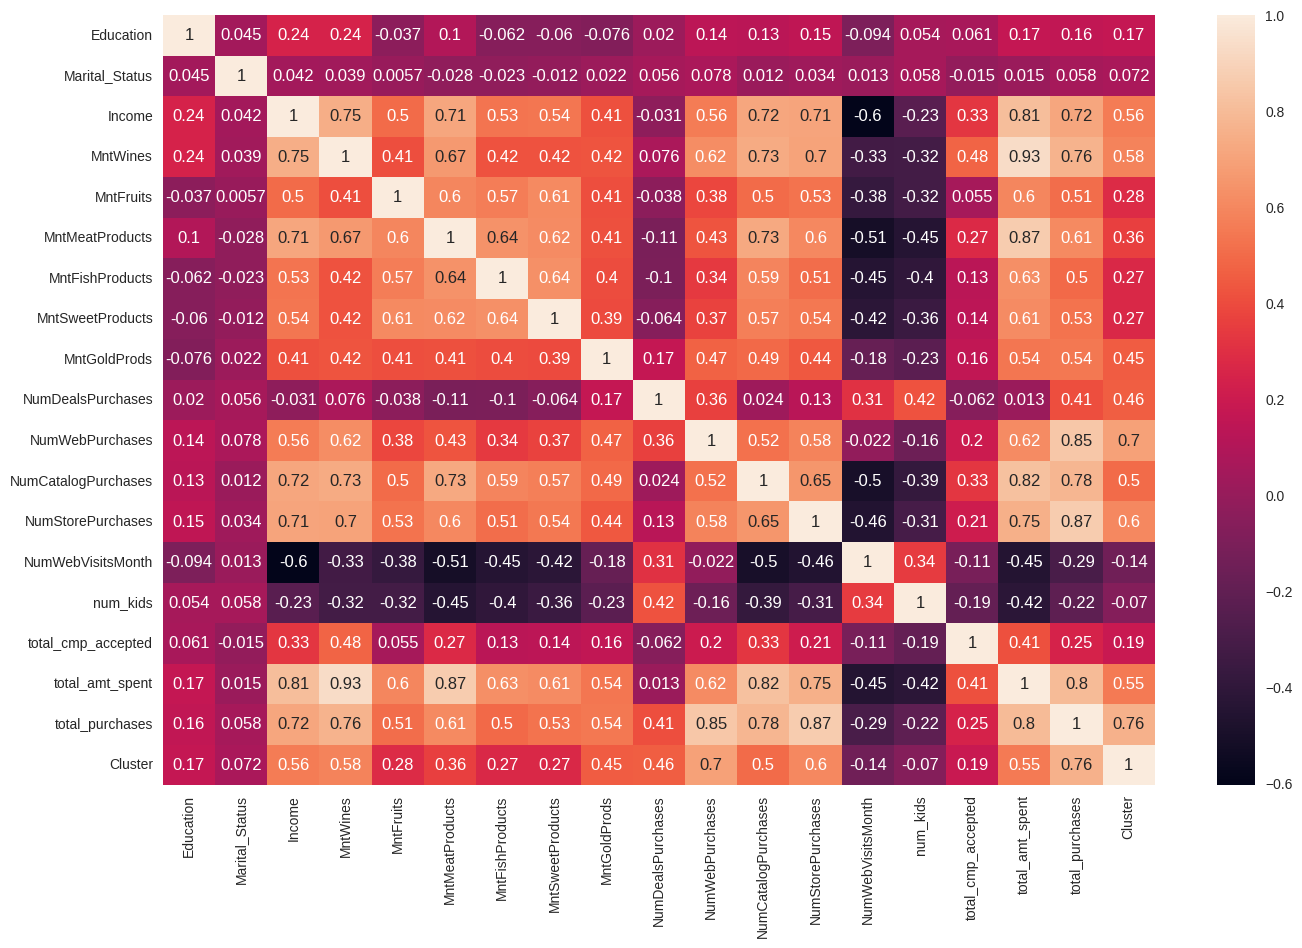

In [ ]:
plt.figure(figsize=((16,10)))
sns.heatmap(data1.corr(),annot=True);